# Homework 1 - Using OLS
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

# Data
* This homework uses the file, `data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

***

# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.


In [1]:
# PACKAGES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
# Read the data
etf_returns = pd.DataFrame(pd.read_excel(r'../data/multi_asset_etf_data.xlsx', sheet_name= 'total returns'))

etf_returns.head(5)


,Date,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
0,2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951,0.000553
1,2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966,-0.000472
2,2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981,0.000599
3,2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
4,2009-08-31,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413,0.000436


In [3]:
portfolio_returns = pd.DataFrame(pd.read_excel(r'../data/multi_asset_etf_data.xlsx', sheet_name= 'portfolio returns'))

portfolio_returns = portfolio_returns[['portfolio']]

portfolio_returns.head(5)
portfolio_returns.shape

(182, 1)

In [4]:
# Reshape the data
#portfolio_returns = portfolio_returns.values.reshape(-1, 1)
#spy_returns = spy_returns.values.reshape(-1, 1)

spy_returns = etf_returns[['SPY']]

spy_returns.head(5)
spy_returns.shape


(182, 1)

In [5]:
# Do the regression and show the coefficients
model = LinearRegression()
model.fit(spy_returns, portfolio_returns)

# Report Alpha, Beta, and R2
print(f"Intercept (alpha): {model.intercept_[0]}")
print(f"Coefficient (beta): {model.coef_[0][0]}")
print(f"R^2: {r2_score(portfolio_returns, model.predict(spy_returns))}")


Intercept (alpha): -0.0016282386799185457
Coefficient (beta): 0.6525033168749357
R^2: 0.7615855536403913



## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 



In [6]:
X = etf_returns[['SPY', 'HYG']]

# Do the regression and show the coefficients
model_multiple = LinearRegression()
model_multiple.fit(X, portfolio_returns)

# Report Alpha, Beta, and R2
print(f"Intercept (alpha): {model_multiple.intercept_[0]}")
print(f"Coefficients (betas): {model_multiple.coef_[0][0], model_multiple.coef_[0][1]}")
print(f"R^2: {model_multiple.score(X, portfolio_returns)}")


Intercept (alpha): -0.0016713542040654172
Coefficients (betas): (np.float64(0.404790304602686), np.float64(0.5369973848150131))
R^2: 0.8353634880706727


## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?


In [7]:
# Calculate fitted values

model_multiple.predict(X)

# R-squared


array([[ 0.11289575],
       [ 0.0373241 ],
       [ 0.0160621 ],
       [ 0.06568318],
       [ 0.00416929],
       [ 0.04382168],
       [-0.01236898],
       [ 0.03231214],
       [ 0.02584719],
       [-0.02622452],
       [ 0.0210157 ],
       [ 0.03442909],
       [ 0.01492541],
       [-0.0589416 ],
       [-0.01664871],
       [ 0.05364891],
       [-0.02519254],
       [ 0.0542223 ],
       [ 0.02365841],
       [-0.00851655],
       [ 0.04038717],
       [ 0.01662186],
       [ 0.02009905],
       [-0.00139521],
       [ 0.01863086],
       [-0.00549506],
       [-0.01156448],
       [-0.00786299],
       [-0.03857544],
       [-0.05824073],
       [ 0.08811055],
       [-0.01634842],
       [ 0.02700244],
       [ 0.02496632],
       [ 0.02718859],
       [ 0.00622957],
       [ 0.00173015],
       [-0.04327697],
       [ 0.03976265],
       [ 0.00860678],
       [ 0.01515296],
       [ 0.01138599],
       [-0.00450501],
       [ 0.00328754],
       [ 0.00947052],
       [ 0

## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?


The SPY beta of the univariate regression is larger than the beta of the multivariate model. 
This is because there is a positive correlation between $r^{SPY}$ and $r^{HYG}$. The multivariate model consider the effect of the feature keeping the other variables constant.


## 5. 
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

I would expect them to have a higher correlation to $r^{hyg}$ because the residual will capture some of the information that $r^{hyg}$ provides and that is consider in the multivariate regression. 
As we noticed, the returns on SPY and HYG have a positive correlation and if we do not include this variable as in the single linear regression, we will be ignoring this correlation and will be captured by the residual, implying a higher correlation.

***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*



In [8]:
model_weights = etf_returns.drop(columns='Date')

model_multiple_weights = LinearRegression()
model_multiple_weights.fit(model_weights, portfolio_returns)

# Get the feature names and coefficients
feature_names = model_weights.columns
coefficients = model_multiple_weights.coef_
print(feature_names)
print(coefficients)

# Create a DataFrame to associate feature names with coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients[0]
})

# Sort the DataFrame by the absolute value of coefficients in descending order
sorted_coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Get the top 4 features with the largest absolute coefficients
top_4_features = sorted_coefficients_df.head(4)
print(top_4_features)



Index(['SPY', 'EFA', 'EEM', 'PSP', 'QAI', 'HYG', 'DBC', 'IYR', 'IEF', 'BWX',
       'TIP', 'SHV'],
      dtype='object')
[[-5.51924535e-16 -8.88178420e-16 -7.48774613e-16  2.50000000e-01
   2.50000000e-01  1.06625309e-16 -4.10799608e-16  2.50000000e-01
   2.50000000e-01 -1.42012443e-16 -5.25348191e-16  2.10800475e-16]]
  Feature  Coefficient
8     IEF         0.25
4     QAI         0.25
7     IYR         0.25
3     PSP         0.25


We can note that most of the coefficients are extremely close to zero. #Why aren't they zero?#
The coefficients that are not zero, are: . Each of them have a 25% share. 
The portfolio is constructed with IEF, QAI, IYR, and PSP

## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2020.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.


In [9]:
# Filter data up to the end of 2020 and prepare target and predictors
X = etf_returns[etf_returns['Date'] <= '2020-12-31'].drop(columns=['Date', 'EEM'])
y = etf_returns[etf_returns['Date'] <= '2020-12-31'][['EEM']]


# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Display results
#print(f"R-squared: {r_squared}")
print(f"R^2: {model.score(X, y)}") # To test if both methods give the same result
print(f"Estimated Coefficients: {model.coef_}")


R^2: 0.8203279417524802
Estimated Coefficients: [[-1.12086978e-01  4.99741014e-01 -3.53773592e-03  7.60848514e-01
   3.01275262e-01 -7.86440637e-03  6.82931532e-02 -9.81503759e-01
   5.45010309e-01  6.94261460e-01  3.56907405e+00]]


#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?


In [10]:
# Add constant to predictors for intercept term
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
model_ols = sm.OLS(y, X_with_const).fit()
print(model_ols.summary())

fitted_values = model_ols.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    EEM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     53.54
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.09e-42
Time:                        19:17:14   Log-Likelihood:                 323.57
No. Observations:                 141   AIC:                            -623.1
Df Residuals:                     129   BIC:                            -587.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.436      0.6

We can note that the only ETFs with a t-stat greater than 2 in absolute value are EFA, IEF (negative), BWX, and TIP.

#### (c) 
Plot the returns of **EEM** along with the replication values.


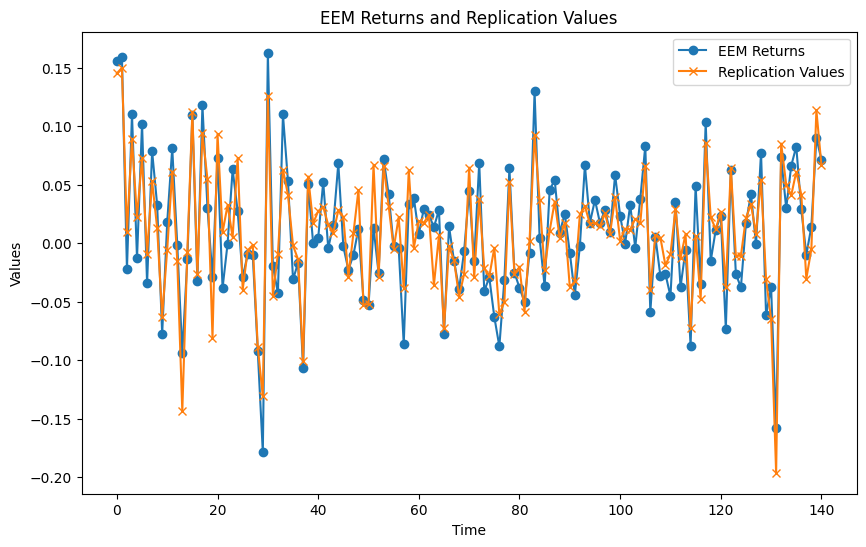

In [11]:
# Plot the returns along with the replication values
plt.figure(figsize=(10, 6))
plt.plot(y, label='EEM Returns', marker='o')
plt.plot(fitted_values, label='Replication Values', marker='x')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('EEM Returns and Replication Values')
plt.legend()
plt.show()

## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2020**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2021-2023** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$



In [12]:
estimated_oos_returns = model.predict(etf_returns[etf_returns['Date'] > '2020-12-31'].drop(columns=['Date', 'EEM']))
#oos_model.fit(etf_returns[etf_returns['Date'] > '2020-12-31'].drop(columns=['Date', 'EEM']), etf_returns[etf_returns['Date'] > '2020-12-31'][['EEM']])

# Ensure estimated_oos_returns is a DataFrame
estimated_oos_returns = pd.DataFrame(estimated_oos_returns, index=etf_returns[etf_returns['Date'] > '2020-12-31'].index, columns=['Estimated_OOS_Returns'])


estimated_oos_returns


,Estimated_OOS_Returns
141,0.000651
142,0.005023
143,0.014466
144,0.028016
145,0.028650
146,-0.017094
147,0.007176
148,0.003962
149,-0.030231
150,0.026773


#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?


In [13]:
actual_returns = etf_returns[etf_returns['Date'] > '2020-12-31'][['EEM']] 

combined_df = actual_returns.join(estimated_oos_returns)

combined_df.corr().loc['EEM', 'Estimated_OOS_Returns']


np.float64(0.8026459963768255)


#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

***

The R-squared is very similar to the version based on in sample data (through 2020).